In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
compras_df = pd.read_csv('data/compras_marzo_2022.csv')

In [3]:
compras_df.head()

,CVE BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA\nPAGO,IMPORTE,SHEET
0,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FB1179781-183011-215,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,210691.81,GTOS VARIOS
1,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FB1190248-183011-220,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,88044.01,GTOS VARIOS
2,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FB1203206-183011-224,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,871.71,GTOS VARIOS
3,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FB1210915-183011-228,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,143554.60,GTOS VARIOS
4,111017,PRAXAIR MEXICO S. DE R.L. DE C.V.,PME960701GG0,FB182281-183011-214,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,871.71,GTOS VARIOS


In [4]:
compras_df.shape

(1939, 11)

## Visión general de los datos

In [5]:
# Conocemos las columnas que tenemos
compras_df.columns

Index(['CVE BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO-#OP', 'FECHA\nPAGO', 'IMPORTE', 'SHEET'],
      dtype='object')

In [6]:
#verificamos el tipo de datos que tenemos
compras_df.dtypes

CVE BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
FDO-#OP         float64
FECHA\nPAGO      object
IMPORTE         float64
SHEET            object
dtype: object

In [7]:
# Cambiamos el formato de la fecha para que este en formato de fecha
compras_df['FECHA\nPAGO'] = pd.to_datetime(compras_df['FECHA\nPAGO'])

In [8]:
#verificamos nuevamente los tipos de datos 
compras_df.dtypes

CVE BEN                  int64
BENEFICIARIO            object
RFC                     object
FACTURA                 object
CONTRATO                object
CONCEPTO                object
TIPO                    object
FDO-#OP                float64
FECHA\nPAGO     datetime64[ns]
IMPORTE                float64
SHEET                   object
dtype: object

In [9]:
# Podemos ver lgunas propiedades estadisticas de las variables numericas
compras_df.describe()

,CVE BEN,FDO-#OP,IMPORTE
count,1939.000000,1.939000e+03,1.939000e+03
mean,192793.269211,1.360590e+08,3.295176e+05
std,84286.998651,1.591105e+08,1.585042e+06
min,110036.000000,1.021791e+06,3.110000e+00
25%,115395.000000,1.021942e+06,2.711250e+03
50%,203013.000000,1.107349e+06,1.294560e+04
75%,311250.000000,3.170003e+08,7.171800e+04
max,370012.000000,6.040001e+08,3.186801e+07


In [10]:
#elegimos las variables con las que vamos a trabajar
compras_df= compras_df[['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO-#OP', 'FECHA\nPAGO', 'IMPORTE', 'SHEET']]

## Análisis unidimensional de las variables

In [11]:
compras_df['SHEET'].value_counts()

GTOS VARIOS                        817
OB.PUBLICA-GTS VARIOS (FDO ESP)    803
SERV PERS                          295
SERV_PROF                           24
Name: SHEET, dtype: int64

In [12]:
compras_df['CONCEPTO'].value_counts()

SERVICIO DE CONFINAMIENTO DE RESIDUOS URBANOS DEL MUNICIPIO DE MONTERREY DEL PERIODO DEL 11 AL 17 DE OCTUBRE DE 2021      12
SERVICIO DE CONFINAMIENTO DE RESIDUOS URBANOS DEL MUNICIPIO DE MONTERREY DEL PERIODO DEL 25 AL 28 DE OCTUBRE DE 2021      11
SERVICIO DE CONFINAMIENTO DE RESIDUOS URBANOS DEL MUNICIPIO DE MONTERREY DEL PERIODO DEL 29 AL 31 DE OCTUBRE DE 2021      11
SERVICIO DE CONFINAMIENTO DE RESIDUOS URBANOS DEL MUNICIPIO DE MONTERREY DEL PERIODO DEL 01 AL 07 DE NOVIEMBRE DE 2021    11
SERVICIO DE CONFINAMIENTO DE RESIDUOS URBANOS DEL MUNICIPIO DE MONTERREY DEL PERIODO DEL 08 AL 14 DE NOVIEMBRE DE 2021    11
                                                                                                                          ..
SEPTIMO EXTRAORDINARIO REEMBOLSO FONDO OP. DEL OP. IMP PREDIAL 2022                                                        1
REEMBOLSO DE CAJA CHICA MES DE FEBRERO 2022                                                                                1


In [13]:
compras_df['CONCEPTO'].unique()

array(['SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACCESORIOS, AGOSTO DEL 2021',
       'SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACCESORIOS, SEPTIEMBRE DEL 2021',
       'SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACCESORIOS, NOVIEMBRE DEL 2021',
       ...,
       'PAGO DE APOYO ESCOLAR DEL C. JOSE LUIS GARZA ALVARADO NOMINA 20887',
       'FONDO DE PENSION 110733',
       'PAGO DE ACUERDO PRODEFUNCION SVT 1A. DICIEMBRE (POR FALLECIMIENTO C. MARIA CARDONA  MENDOZA)'],
      dtype=object)

In [14]:
#Proceemos a ver cuantas facturas o pagos ha hecho cada proveedor
compras_df['BENEFICIARIO'].value_counts()

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    216
NUEVO MERCADO PRESIDENTE BENITO JUAREZ                149
S.I.M.E.P.R.O.D.E.                                    114
AUTOKAM REGIOMONTANA,S.A.DE C.V.                       61
INTERASFALTOS, S.A. DE C.V.                            51
                                                     ... 
NEVAREZ MONTALVO JOSE ALEJANDRO                         1
HERNANDEZ CRUZ FIDEL                                    1
HERNANDEZ DE LA ROSA MAGALY YADIRA                      1
NAVARRO YZABAL SERGIO SIMON                             1
ZEPEDA CARDONA LAURA AMPARO                             1
Name: BENEFICIARIO, Length: 470, dtype: int64

In [15]:
compras_df['IMPORTE'].value_counts()

100.00      37
794.99      21
1200.00     17
1494.98     17
624.98      15
            ..
26680.00     1
21042.40     1
16475.48     1
60532.28     1
6328.57      1
Name: IMPORTE, Length: 1579, dtype: int64

<AxesSubplot:>

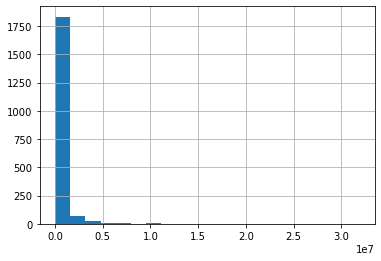

In [16]:
compras_df['IMPORTE'].hist(bins=20)

<AxesSubplot:>

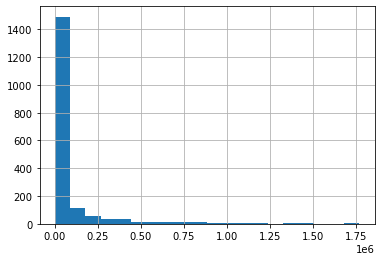

In [17]:
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=20)

<AxesSubplot:>

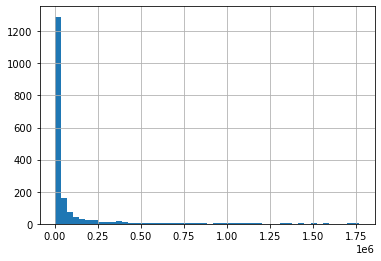

In [18]:
compras_df[compras_df['IMPORTE'] < compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

La mayoria de los pagos o gastos son menore a 0.50e+06


## Análisis multidimensional de las variables

In [19]:
#veamos cuales son los provedores o beneficiarios con mayores pagos
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum()

In [20]:
sum_importe_beneficiario

BENEFICIARIO
2814 INMUEBLES S. DE R.L. DE C.V.                24896.00
ABUNDIS  ALBERTO                                 48780.00
ACUÑA RODRIGUEZ SAMUEL ABRAHAM                   37892.96
ADK CONSTRUCCIONES, SA. DE CV.                  791402.13
ADMON DE PROY Y SERVICIOS EN CONDOMINIO, SC.    339702.69
                                                  ...    
VILLARREAL BARBARIN WILBUR JARIM                163902.16
VILLARREAL LOPEZ TERESA ELIZABETH                 5150.00
ZAPATA CHAVIRA HOMERO ARTURO                     56700.00
ZAVALA SANTILLAN MOISES                          19314.22
ZEPEDA CARDONA LAURA AMPARO                       6328.57
Name: IMPORTE, Length: 470, dtype: float64

In [21]:
#le aplicamos indices para una mejor presentacion y manejo
sum_importe_beneficiario.reset_index()

,BENEFICIARIO,IMPORTE
0,2814 INMUEBLES S. DE R.L. DE C.V.,24896.00
1,ABUNDIS ALBERTO,48780.00
2,ACUÑA RODRIGUEZ SAMUEL ABRAHAM,37892.96
3,"ADK CONSTRUCCIONES, SA. DE CV.",791402.13
4,"ADMON DE PROY Y SERVICIOS EN CONDOMINIO, SC.",339702.69
...,...,...
465,VILLARREAL BARBARIN WILBUR JARIM,163902.16
466,VILLARREAL LOPEZ TERESA ELIZABETH,5150.00
467,ZAPATA CHAVIRA HOMERO ARTURO,56700.00
468,ZAVALA SANTILLAN MOISES,19314.22


In [22]:
#aplicamos un sort para ordenar los valores de mayor a menor
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False)

,BENEFICIARIO,IMPORTE
301,MUNICIPIO DE LA CIUDAD DE MONTERREY,1.049967e+08
364,"RED RECOLECTOR, S.A. DE C.V.",6.508988e+07
214,"HISA FARMACEUTICA, S.A. DE C.V.",3.078226e+07
226,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",2.570800e+07
146,"FOJA INGENIEROS CONSTRUCTORES, SA. DE CV.",2.558035e+07
...,...,...
171,GERARDO QUEZADA GRACIELA,5.000000e+02
150,GAMA HERNANDEZ JAIME CHRISTIAN,1.872000e+02
441,TESORERIA DE LA FEDERACION,1.840000e+02
227,INFONACOT,1.508900e+02


<AxesSubplot:title={'center':'Beneficiarios con mayor importe'}, xlabel='BENEFICIARIO'>

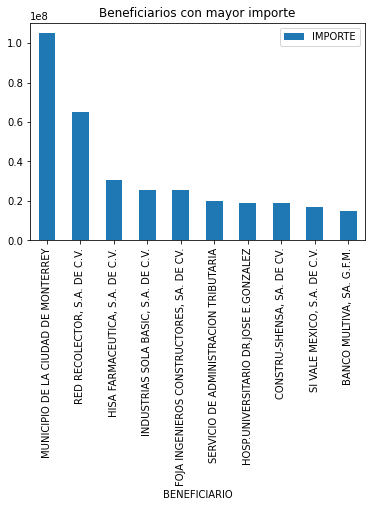

In [25]:
#graficamos los primeros 10 beneficiarios con maoyores pagos
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[:10].plot(x='BENEFICIARIO', y='IMPORTE', kind='bar', legend=True, title='Beneficiarios con mayor importe')

In [26]:
#vamos a ver el gasto promedio por hoja
mean_importe_sheet = compras_df.groupby('SHEET')['IMPORTE'].mean()

<AxesSubplot:title={'center':'Promedio de gasto por Sheet'}, xlabel='SHEET'>

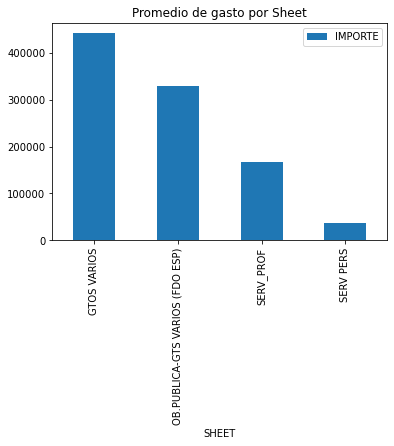

In [28]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[:10].plot(x='SHEET', y='IMPORTE', kind='bar', legend=True, title='Promedio de gasto por Sheet')

In [29]:
#Vamos a ver los gastos por fecha
sum_importe_fecha = compras_df.groupby('FECHA\nPAGO')['IMPORTE'].sum()

In [32]:
sum_importe_fecha.reset_index()

,FECHA\nPAGO,IMPORTE
0,2022-03-02,3.822930e+07
1,2022-03-03,1.322410e+07
2,2022-03-04,8.856641e+07
3,2022-03-07,2.644905e+06
4,2022-03-08,4.466500e+04
5,2022-03-09,1.030504e+07
6,2022-03-10,2.028542e+06
7,2022-03-11,1.055220e+08
8,2022-03-14,8.137525e+06
9,2022-03-15,3.059000e+03


In [42]:
#Hacemos un filtro de los gastos unicamente de gastos varios
compras_gastos_df =compras_df[compras_df['SHEET']  == 'GTOS VARIOS']

In [43]:
compras_gastos_df

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA\nPAGO,IMPORTE,SHEET
0,PRAXAIR MEXICO S. DE R.L. DE C.V.,FB1179781-183011-215,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,210691.81,GTOS VARIOS
1,PRAXAIR MEXICO S. DE R.L. DE C.V.,FB1190248-183011-220,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,88044.01,GTOS VARIOS
2,PRAXAIR MEXICO S. DE R.L. DE C.V.,FB1203206-183011-224,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,871.71,GTOS VARIOS
3,PRAXAIR MEXICO S. DE R.L. DE C.V.,FB1210915-183011-228,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,143554.60,GTOS VARIOS
4,PRAXAIR MEXICO S. DE R.L. DE C.V.,FB182281-183011-214,SAD-638-2021,"SUMINISTRO DE OXIGENO, GASES MEDICINALES Y ACC...",TR,1021838.0,2022-03-04,871.71,GTOS VARIOS
...,...,...,...,...,...,...,...,...,...
812,"GS GAS Q, S.A. DE C.V.",BPLGK 78473201-183011-636,SAD-627-2020,CONSUMO DIESEL DE LA SEMANA 22 AL 28 NOVIEMBRE...,TR,1021899.0,2022-03-11,119769.15,GTOS VARIOS
813,"GS GAS Q, S.A. DE C.V.",BPLGK 78473203-183011-622,SAD-627-2020,CONSUMO DIESEL DE LA SEMANA 29 AL 30 NOVIEMBRE...,TR,1021899.0,2022-03-11,64051.63,GTOS VARIOS
814,"GS GAS Q, S.A. DE C.V.",BPLGK78473198-183011-586,SAD-627-2020,CONSUMO DE GASOLINA SEMANA 22 AL 28 NOVIEMBRE ...,TR,1021899.0,2022-03-11,2231.96,GTOS VARIOS
815,"GS GAS Q, S.A. DE C.V.",BPLGK78473206-183011-632,SAD-627-2020,CONSUMO DIESEL DE LA SEMANA 01 AL 05 DICIEMBRE...,TR,1021899.0,2022-03-11,33220.03,GTOS VARIOS


<AxesSubplot:>

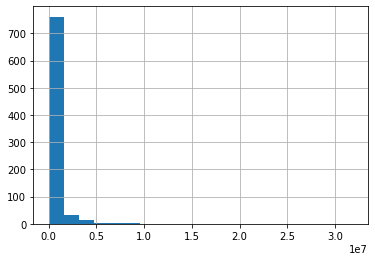

In [44]:
compras_gastos_df['IMPORTE'].hist(bins=20)

In [48]:
#veamos que paso cuando el beneficiario es el municipio de monterrey
compras_df[compras_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA\nPAGO,IMPORTE,SHEET
513,MUNICIPIO DE LA CIUDAD DE MONTERREY,183009-111,NO APLICA,FINIQUITO DE FONDO DE ASISTENCIA SOCIAL DEL DI...,CH,1107454.0,2022-03-25,49949.00,GTOS VARIOS
514,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-5-A-183010-664,NO APLICA,"PAGO DE NÓMINA PERIODO: 5-2022, BANCO: BANCA A...",TR,11000243.0,2022-03-28,31868014.34,GTOS VARIOS
515,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-5-B-183010-666,NO APLICA,"PAGO DE NÓMINA PERIODO: 5-2022, BANCO: BANCO M...",TR,231000150.0,2022-03-28,17667078.97,GTOS VARIOS
516,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-4-C-183010-561,NO APLICA,"PAGO DE NÓMINA PERIODO: 4-2022, BANCO: BANCO M...",TR,240000165.0,2022-03-28,224588.67,GTOS VARIOS
517,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-5-C-183010-663,NO APLICA,"PAGO DE NÓMINA PERIODO: 5-2022, BANCO: BANCO M...",TR,240000166.0,2022-03-28,4046806.26,GTOS VARIOS
518,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-5-C-183010-687,NO APLICA,"PAGO DE NÓMINA PERIODO: 5-2022, BANCO: BANCO M...",TR,240000167.0,2022-03-28,188624.23,GTOS VARIOS
519,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-5-BBVA-183010-665,NO APLICA,"PAGO DE NÓMINA PERIODO: 5-2022, BANCO: BBVA BA...",TR,328000013.0,2022-03-28,1907335.68,GTOS VARIOS
520,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-6-A-183010-843,NO APLICA,"PAGO DE NÓMINA PERIODO: 6-2022, BANCO: BANCA A...",TR,11000244.0,2022-03-31,26951622.47,GTOS VARIOS
521,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-6-A-183010-888,NO APLICA,"PAGO DE NÓMINA PERIODO: 6-E-2022, BANCO: BANCA...",TR,11000245.0,2022-03-31,81750.41,GTOS VARIOS
522,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-6-B-183010-845,NO APLICA,"PAGO DE NÓMINA PERIODO: 6-2022, BANCO: BANCO M...",TR,231000151.0,2022-03-31,15332605.20,GTOS VARIOS


In [50]:
compras_df[compras_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY'].shape

(15, 9)

In [49]:
#vemos cuales son los tipos de gastos que tuvo el municipio de monterrey
compras_df[compras_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']['SHEET'].value_counts()

GTOS VARIOS    15
Name: SHEET, dtype: int64

In [54]:
#comparando gastos por beneficiario y por sheet
compras_sheet_beneficiarios = compras_df.groupby(['BENEFICIARIO', 'SHEET'])['IMPORTE'].sum().sort_values().unstack('SHEET')

In [55]:
compras_sheet_beneficiarios

SHEET,GTOS VARIOS,OB.PUBLICA-GTS VARIOS (FDO ESP),SERV PERS,SERV_PROF
BENEFICIARIO,,,,
2814 INMUEBLES S. DE R.L. DE C.V.,24896.0,NaN,NaN,NaN
ABUNDIS ALBERTO,NaN,NaN,NaN,48780.0
ACUÑA RODRIGUEZ SAMUEL ABRAHAM,NaN,NaN,37892.96,NaN
"ADK CONSTRUCCIONES, SA. DE CV.",NaN,791402.13,NaN,NaN
"ADMON DE PROY Y SERVICIOS EN CONDOMINIO, SC.",NaN,339702.69,NaN,NaN
...,...,...,...,...
VILLARREAL BARBARIN WILBUR JARIM,NaN,NaN,163902.16,NaN
VILLARREAL LOPEZ TERESA ELIZABETH,NaN,NaN,5150.00,NaN
ZAPATA CHAVIRA HOMERO ARTURO,NaN,NaN,NaN,56700.0


In [56]:
#vamos a localizar a los beneficiarios que han tenido mas compras
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[:10]

<AxesSubplot:title={'center':'Mayores beneficiarios'}, xlabel='BENEFICIARIO'>

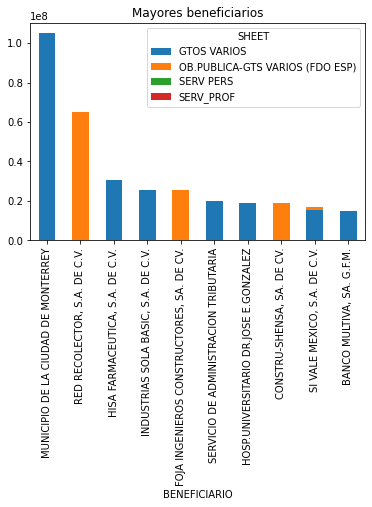

In [57]:
#graficamos en donde se vean los tipos de contratos
compras_sheet_beneficiarios.loc[top_beneficiarios].plot(kind='bar', stacked=True, title='Mayores beneficiarios')

## Análisis de texto

In [62]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

print(stopwords.words('spanish'))


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gmgar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
textos_compras = ''
for row in compras_df['CONCEPTO']:
    textos_compras = textos_compras + ' ' +row

In [66]:
stopwords_list = stopwords.words('spanish') + ['2022', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty']

In [82]:
%conda list

# packages in environment at C:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
absl-py                   1.0.0                    pypi_0    pypi
alabaster                 0.7.12             pyhd3eb1b0_0  
altair                    4.2.0                    pypi_0    pypi
anaconda                  2021.11                  py39_0  
anaconda-client           1.9.0            py39haa95532_0  
anaconda-navigator        2.1.2            py39haa95532_0  
anaconda-project          0.10.1             pyhd3eb1b0_0  
anyio                     2.2.0            py39haa95532_2  
appdirs                   1.4.4              pyhd3eb1b0_0  
argh                      0.26.2           py39haa95532_0  
argon2-cffi               20.1.0           py39h2bbff1b_1  
arrow                     0.13.1           py39haa95532_0  
asn1crypto                1.4.0                      py_0  
astroid                 

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
WC = WordCloud(background_color='white')
WC.generate(textos_compras)

plt.axis('off')
plt.imshow(WC, interpolation='bilinear')
plt.show()

In [ ]:
# quitamos los stopwords
textos_compras = ' '.join([x for x in textos_compras.split().lower().split(' ') if x not in stopwords_list and len(x) > 4])

In [ ]:
WC = WordCloud(background_color='white')
WC.generate(textos_compras)

plt.axis('off')
plt.imshow(WC, interpolation='bilinear')
plt.show()